In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

###Feature Extraction

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 183MB/s]
100% 1.06G/1.06G [00:11<00:00, 98.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16


In [6]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)

)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
conv_base.trainable = False

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [12]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#Normalize

def process(image, label):
  image = tensorflow.cast(image/255.,tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(train_ds , epochs =10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 106ms/step - loss: 0.2778 - accuracy: 0.8835 - val_loss: 0.2030 - val_accuracy: 0.9118
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1912 - accuracy: 0.9204 - val_loss: 0.2186 - val_accuracy: 0.9052
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1637 - accuracy: 0.9320 - val_loss: 0.2072 - val_accuracy: 0.9136
Epoch 4/10
625/625 [==============================] - 58s 93ms/step - loss: 0.1394 - accuracy: 0.9428 - val_loss: 0.2556 - val_accuracy: 0.9012
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1220 - accuracy: 0.9512 - val_loss: 0.2257 - val_accuracy: 0.9144
Epoch 6/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0953 - accuracy: 0.9628 - val_loss: 0.2348 - val_accuracy: 0.9080
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0770 - accuracy: 0.9701 - val_loss: 0.2556 - val_accura

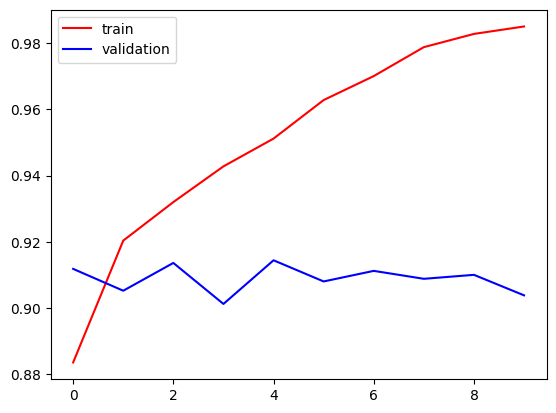

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()


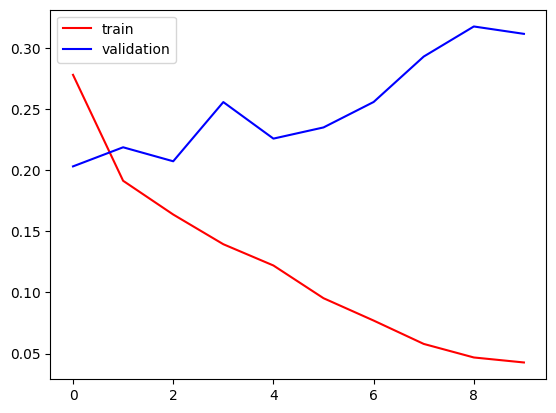

In [17]:
plt.plot(history.history['loss'],color = 'red', label ='train')
plt.plot(history.history['val_loss'],color = 'blue', label ='validation')
plt.legend()
plt.show()

In [ ]:
#Data Augmentation to reduce overfitting